# TP1
### Alumno: Gonzalo Gontad

In [1]:
#%matplotlib

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

## Parte 1 (imágenes en /white_patch y /coord_cromaticas):
1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.
2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.
3. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch.

### 1.1

In [2]:
def change_chrom_coord(input_image:np.ndarray) -> np.ndarray: 
    '''
    Argumentos
    img: Imagen de entrada
    ---------------------------------------
    Retorno
    Imagen: (numpy.ndarray) con cambio de coordenadas cromáticas
    '''
    suma = input_image.sum(axis=2, keepdims=True).astype(np.float64)    
    img_new = np.zeros(input_image.shape)
    img_new = np.divide(input_image, suma, where=suma!=0) # Evita division por 0
    # Llevo al rango 0-255
    img_new = 255 * (img_new)
    # Clip trunca al rango 0 a 255 (ningun dato deberia estar por fuera en este punto)
    np.clip(img_new, 0, 255, out = img_new)       

    return img_new.astype('uint8')


In [3]:
def plot_transformed_images (images, path, function):
    '''
    Argumentos
    images: Lista de imagenes
    path: Ruta de las imagenes
    function: Funcion a aplicar a las imagenes
    ---------------------------------------
    Plotea la imagen original y la imagen transformada'''
    #_, axes = plt.subplots(len(images), 2, figsize=(10, 5*len(images)))
    for i in range(len(images)):
        image= cv.imread(path + images[i], cv.IMREAD_COLOR)
        _, axes = plt.subplots(1, 2, figsize=(10, image.shape[1]*5/image.shape[0]))
        axes[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
        axes[0].title.set_text("Original")
        axes[0].xaxis.set_visible(False)
        axes[0].yaxis.set_visible(False)
        axes[1].imshow(cv.cvtColor(function(image), cv.COLOR_BGR2RGB))
        axes[1].title.set_text("Transformada")
        axes[1].xaxis.set_visible(False)
        axes[1].yaxis.set_visible(False)


In [4]:
path = "TP1/coord_cromaticas/"
imagenes = ["CoordCrom_1.png", "CoordCrom_2.png", "CoordCrom_3.png"]

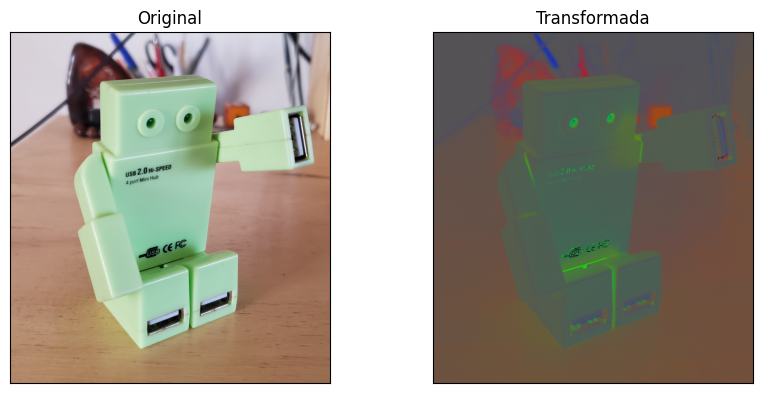

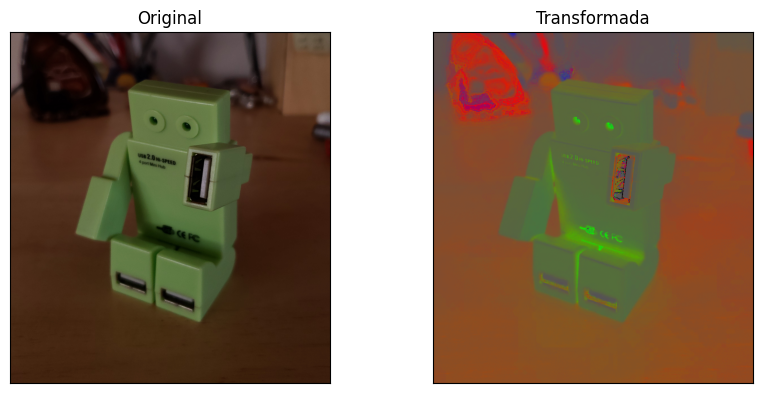

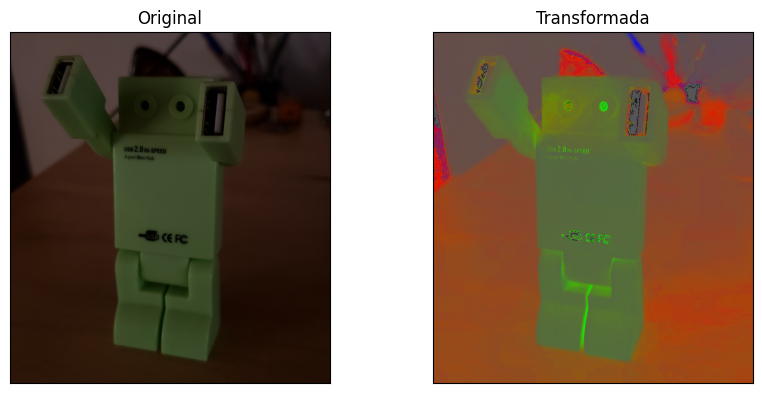

In [5]:
plot_transformed_images(imagenes, path, change_chrom_coord)

### 1.2


In [6]:
path = "TP1/white_patch/"
imagenes = ["test_blue.png", "test_green.png", "test_red.png", "wp_blue.jpg", "wp_green.png","wp_green2.jpg", "wp_red.png", "wp_red2.jpg"]

In [7]:
def white_patch(input_image:np.ndarray) -> np.ndarray: 
    '''
    Argumentos
    img: Imagen de entrada
    ---------------------------------------
    Retorno
    Imagen: (numpy.ndarray) con correccion de colores por white patch
    '''
    #suma = input_image.sum(axis=2, keepdims=True).astype(np.float64)
    
    #img_new = np.zeros(input_image.shape)
    #img_new = np.divide(input_image, suma, where=suma!=0)
    # Llevo al rango 0-255
    print (np.max(input_image, axis=(0,1)))
    #img_new = 255 * (input_image / np.max(input_image, axis=(0,1)))
    maximos = np.max(input_image, axis=(0,1))
    img_new = 255 * np.divide(input_image, maximos, where=maximos!=0)
    # Clip trunca a lo que se le diga (0 a 255)
    np.clip(img_new, 0, 255, out = img_new)       

    return img_new.astype('uint8')


[200 138 165]
[171 250 210]
[175 157 247]
[255 255 255]
[155 252 126]
[172 255 170]
[122 134 255]
[203 201 255]


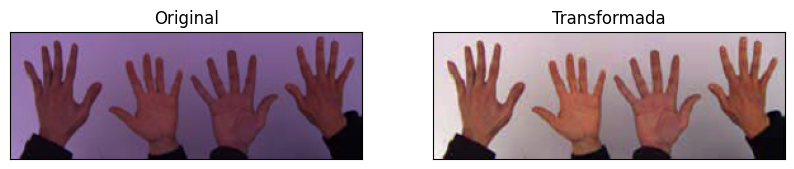

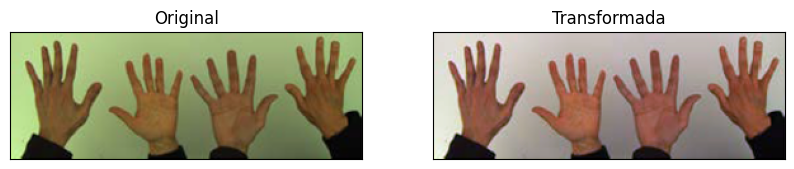

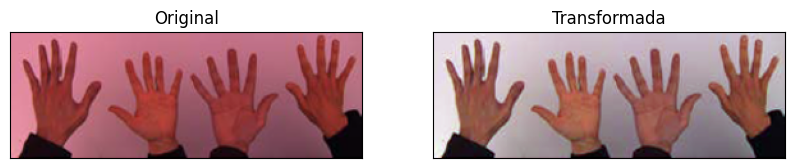

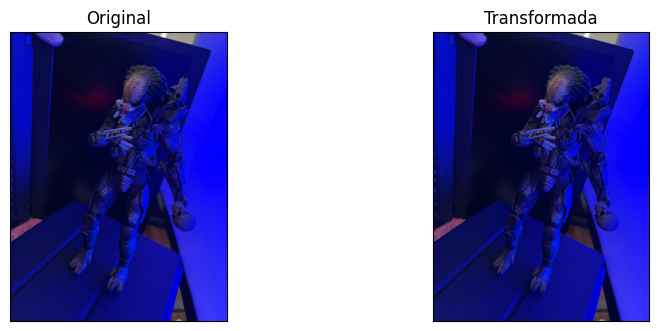

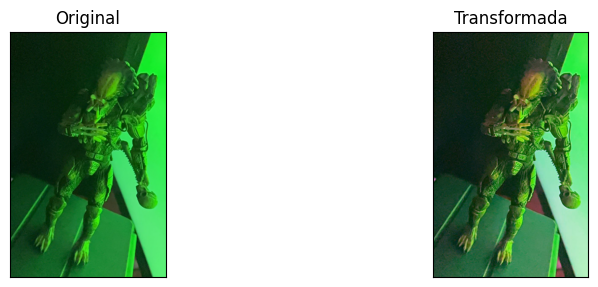

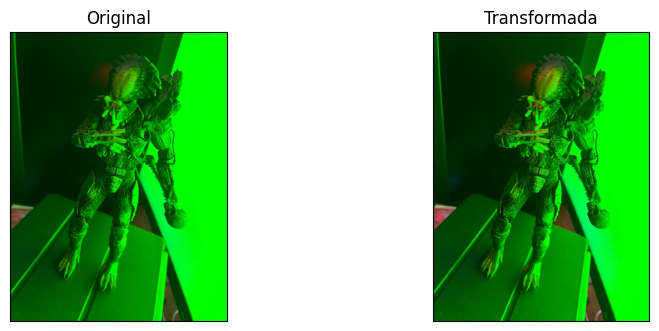

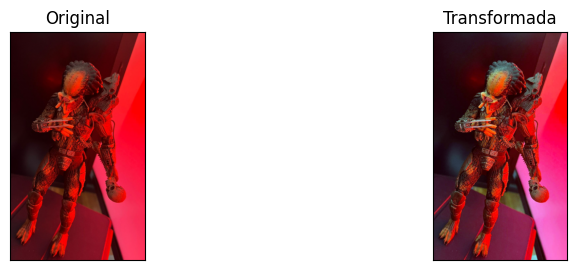

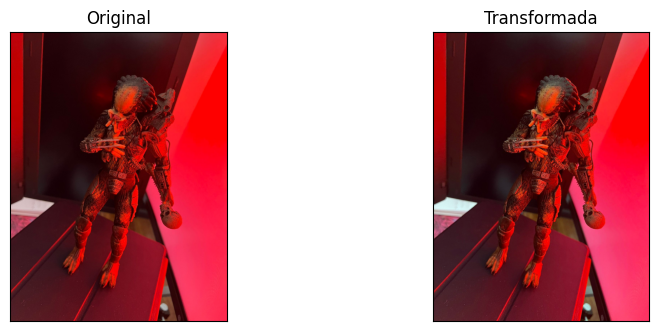

In [8]:
plot_transformed_images(imagenes, path, white_patch)

### 1.3
El principal problema de white patch es que es muy vulnerable a pixeles con colores saturados. Por ejemplo con un solo pixel en la imagen que tenga sus tres canales en 255 asumiremos que se trata de una imagen con iluminacion blanca y la correccion de color no sera correcta.
Esto se puede apreciar claramente en la cuarta imagen donde la iluminacion es predominantemente azul, pero los maximos en cada canal son 255 255 255 y no resulta en una correccion de color efectiva.


# Parte 2:
1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas. 
2. Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si. 
Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes,
considera que puede ser de utilidad tomar como ‘features’ a los histogramas?
3. Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los 
elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes 
separadas.

### 2.1 y 2.2

In [9]:
path = "TP1/"
imagenes = ["img1_tp.png", "img2_tp.png"]

(288, 287)
(288, 287)


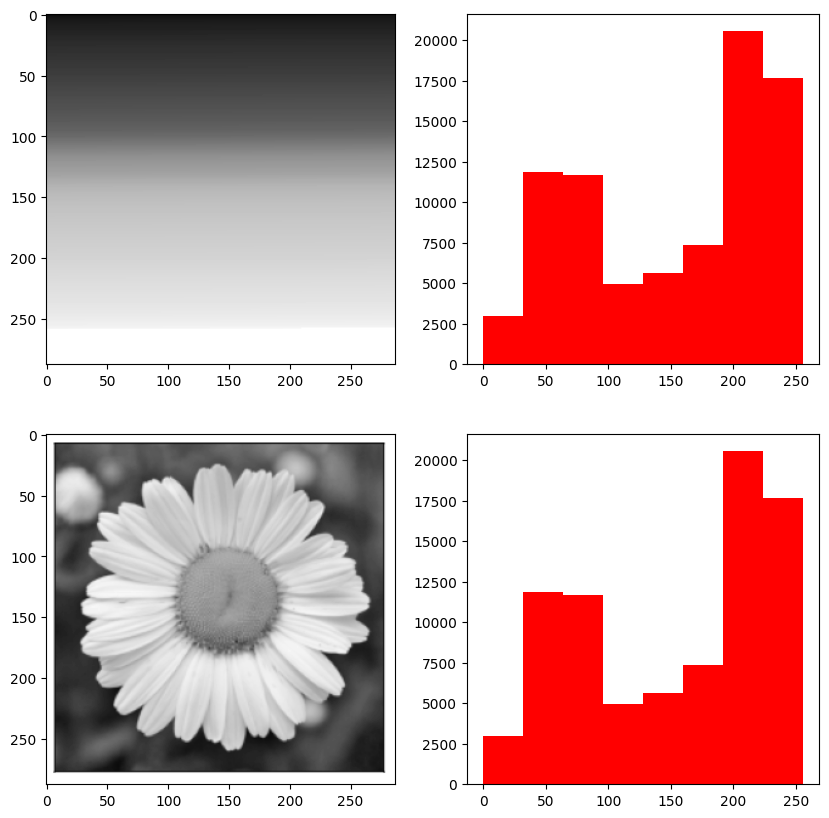

In [10]:
_, axes = plt.subplots(len(imagenes), 2, figsize=(10, 5*len(imagenes)))
for i in range(len(imagenes)):
    image = cv.imread(path + imagenes[i],cv.IMREAD_GRAYSCALE)
    print (np.shape(image))
    axes[i][0].imshow(image, cmap='gray', vmin=0, vmax=255)
    axes[i][1].hist(image.ravel(),8,[0,256], color='r')

En este ejemplo se puede ver que ambos histogramas son identicos, por lo que no es conveniente utilizar el histograma como feature para clasificar imagenes (principalmente si se trata de una imagen monocromatica).


### 2.3

In [11]:
path = "TP1/segmentacion.png"

(628, 953, 3)
(628, 953, 3)
(628, 953, 3)


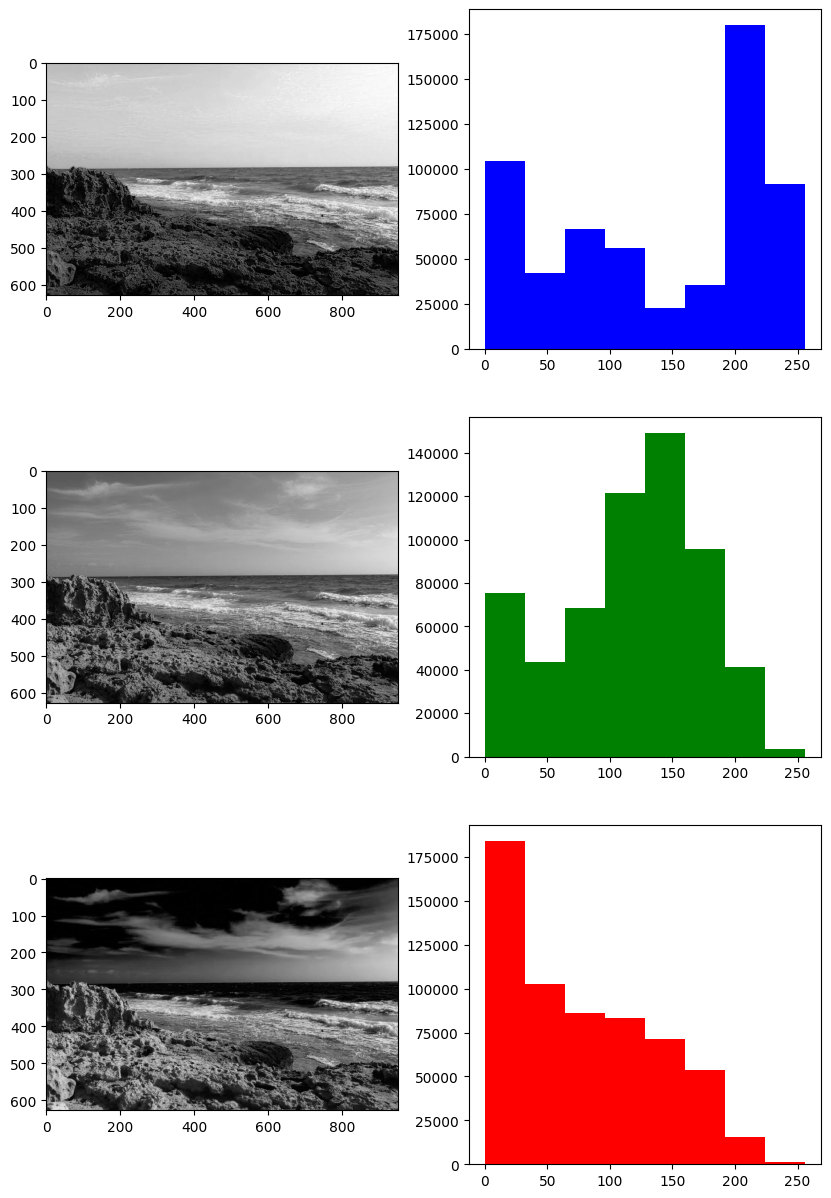

In [12]:
_, axes = plt.subplots(3, 2, figsize=(10, 5*3))
image = cv.imread(path,cv.IMREAD_COLOR)
colors = ('b','g','r')
for i in range(3):
    print (np.shape(image))
    channel = image[:,:,i]
    axes[i][0].imshow(channel, cmap='gray', vmin=0, vmax=255)
    axes[i][1].hist(channel.ravel(),8,[0,256], color=colors[i])

En estas tres imagenes (Canales azul, verde y rojo) se puede ver que:
    - El cielo tiene mucha intensidad en los canales Azul y Verde, y poca en el canal Rojo (con excepcion de las nubes donde aparece mayor compenente roja).
    - La tierra tiene mucha intensidad en el canal Rojo, media intensidad en el canal verde y baja en el canal azul.
    - El agua tiene intensidad media en los canales Azul y Verde, y poca en el canal Rojo (con la excepcion de las olas donde la intesidad del canal rojo es alto).

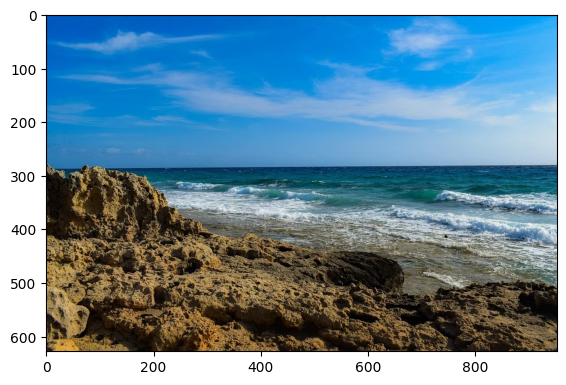

In [13]:
_,ax = plt.subplots(1,1, figsize=(10*image.shape[0]/image.shape[1], 10))
ax.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

In [14]:
def show_histograms_rgb (image):
    _, axes = plt.subplots(1, 4, figsize=(20, 5))
    colors = ('b','g','r')
    axes[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    for i in range(3):
        channel = image[:,:,i]
        axes[i+1].hist(channel.ravel(),8,[0,256], color=colors[i])


In [15]:
def show_segmentation (image, low_thresholds, high_thresholds):
    mask = cv.inRange(image, np.array(low_thresholds),  np.array(high_thresholds))
    segmented = cv.bitwise_and(image, image, mask=mask)
    #show cielo
    _, ax = plt.subplots(1, 1, figsize=(10, 10*image.shape[1]/image.shape[0]))
    ax.imshow(cv.cvtColor(segmented, cv.COLOR_BGR2RGB))

### Segmentacion del cielo:

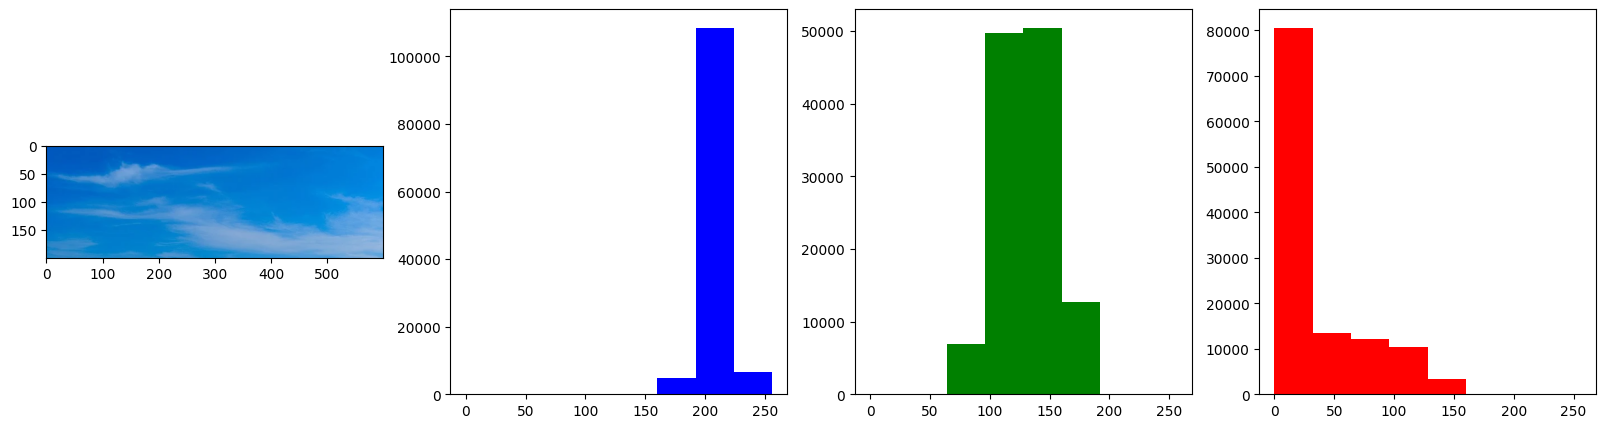

In [16]:
#tomo una muestra del cielo
cielo = image[0:200, 0:600, :]
#Hago los histogramas de las muestras
show_histograms_rgb(cielo)



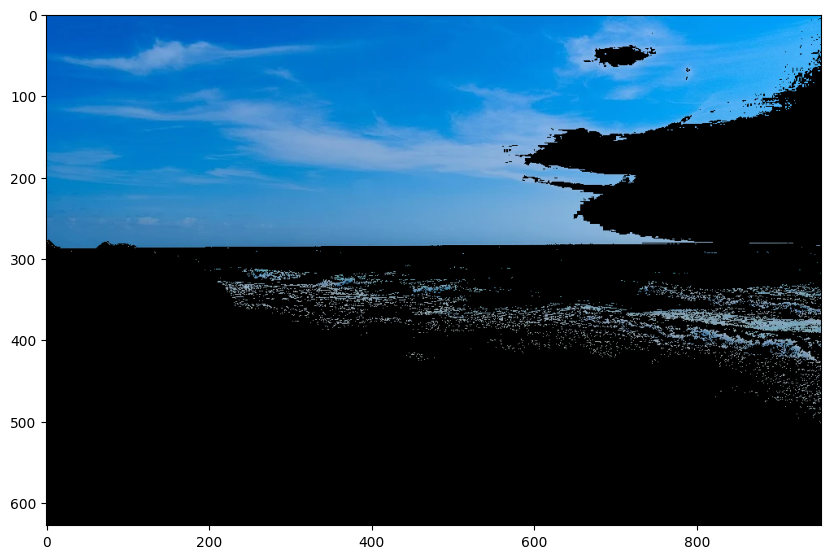

In [17]:
#De los histogramas obtengo los limites inferior y superior
low_threshold = [160, 60, 0]
high_threshold = [255, 180, 160]
#Hago la segmentacion y la muestro
show_segmentation(image, low_threshold, high_threshold)

### Segmentacion de la tierra:

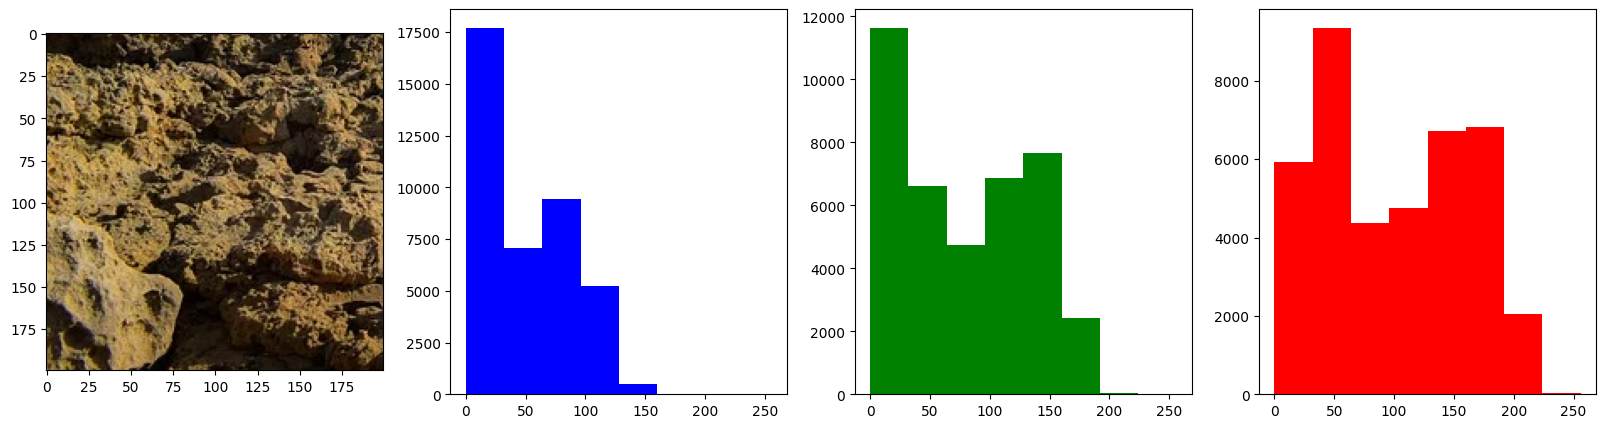

In [18]:
#Tomos una muestra de la tierra
tierra = image[400:600, 0:200, :]
#Hago los histogramas de las muestras
show_histograms_rgb(tierra)

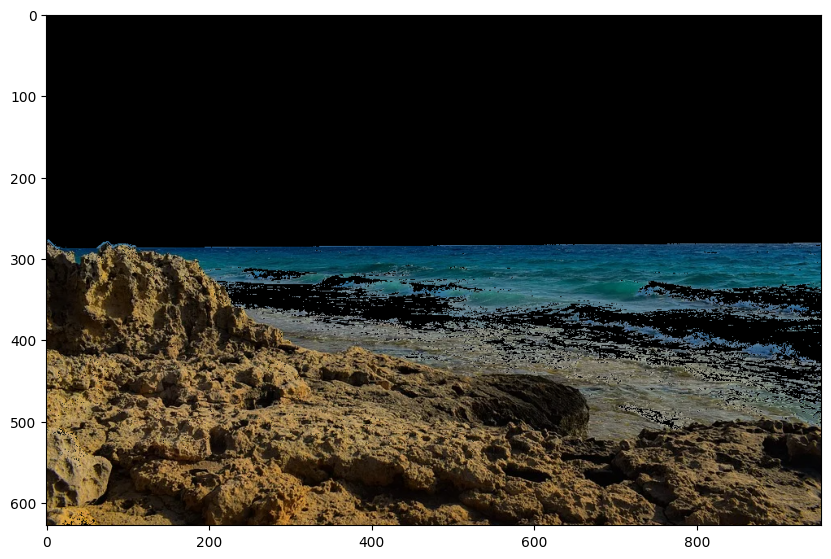

In [19]:
low_threshold = [0, 0, 0]
high_threshold = [160, 180, 225]
show_segmentation(image,low_threshold, high_threshold)

Con esta segmentacion aun se toma gran parte del agua. Esto se puede mejorar tomando limites mas estrictos en los canales azul y verde.

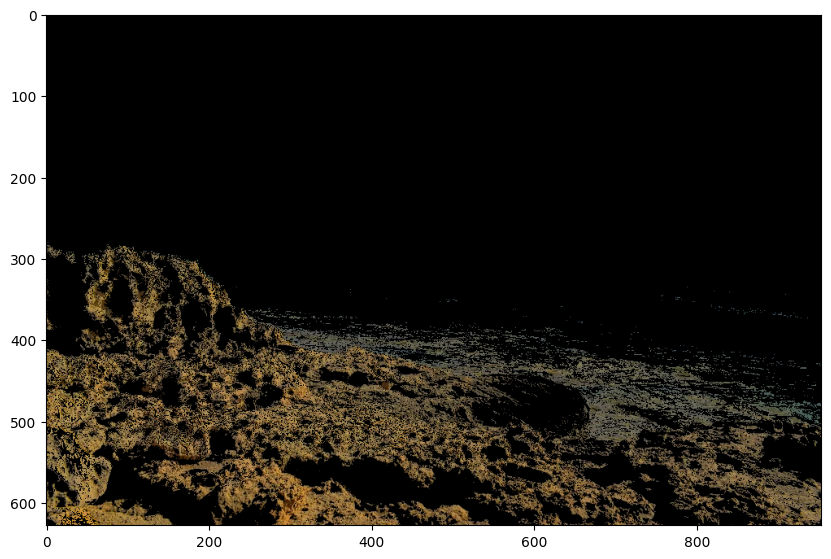

In [20]:
low_threshold = [0, 0, 60]
high_threshold = [100, 160, 225]
show_segmentation(image,low_threshold, high_threshold)

#### Segmenatcion del agua:

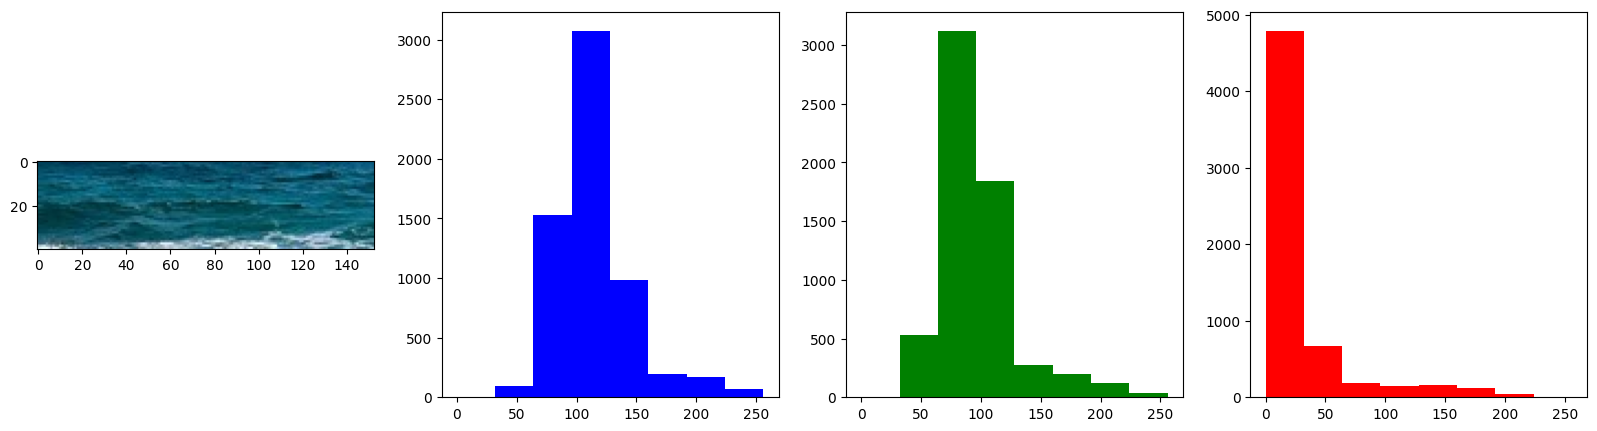

In [21]:
#Tomo una seccion del agua sin olas
agua = image[300:340, 800:, :]

show_histograms_rgb(agua)

Se toma una seccion de agua sin olas porque el histograma de una porcion mayor lleva a limites que incluyen secciones de tierra y cielo.

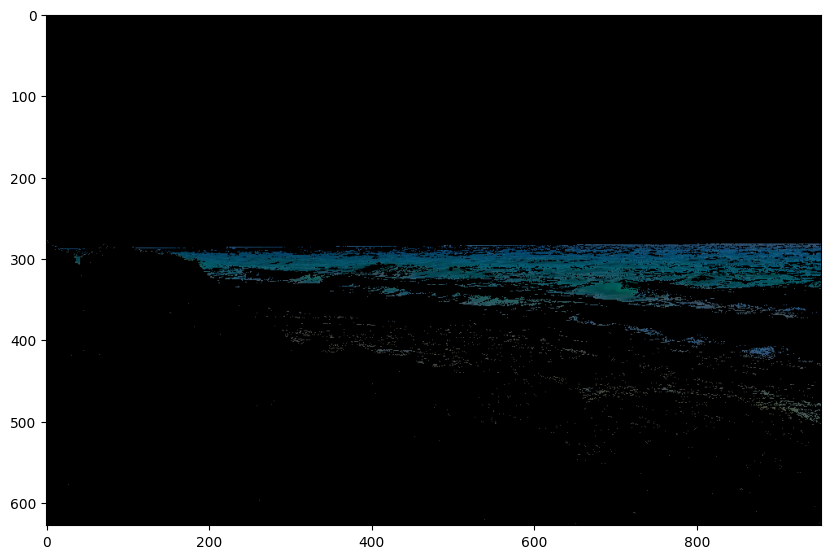

In [22]:
low_threshold = [60, 60, 0]
high_threshold = [150, 100, 80]
show_segmentation(image,low_threshold, high_threshold)